Packages

keras

In [221]:
#tensorflow: use some TF tools
import tensorflow as tf
#Keras: Deep learning API. In TF 2.x, it is included in TF
from tensorflow import keras
from tensorflow.keras.models import Sequential


#Import Dense layer
from tensorflow.keras.layers import Dense, Flatten, Dropout, Embedding
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.metrics import AUC

import os

from sklearn.metrics import roc_auc_score

import pandas as pd

import matplotlib.pyplot as pyplot
%matplotlib inline


Hyper parameters

In [178]:
output_dir = "model_output/dense"

epochs = 4
batch_size = 128

n_dim = 64 #vector dimensions
n_unique_words = 5000
n_words_to_skip = 50
max_review_length = 100
pad_type = trunc_type = 'pre'

n_dense = 64
dropout = 0.5

IMDb

In [179]:
from tensorflow.keras.datasets import imdb

In [180]:
#imdb.get_word_index()

{'fawn': 34701,
 'tsukino': 52006,
 'nunnery': 52007,
 'sonja': 16816,
 'vani': 63951,
 'woods': 1408,
 'spiders': 16115,
 'hanging': 2345,
 'woody': 2289,
 'trawling': 52008,
 "hold's": 52009,
 'comically': 11307,
 'localized': 40830,
 'disobeying': 30568,
 "'royale": 52010,
 "harpo's": 40831,
 'canet': 52011,
 'aileen': 19313,
 'acurately': 52012,
 "diplomat's": 52013,
 'rickman': 25242,
 'arranged': 6746,
 'rumbustious': 52014,
 'familiarness': 52015,
 "spider'": 52016,
 'hahahah': 68804,
 "wood'": 52017,
 'transvestism': 40833,
 "hangin'": 34702,
 'bringing': 2338,
 'seamier': 40834,
 'wooded': 34703,
 'bravora': 52018,
 'grueling': 16817,
 'wooden': 1636,
 'wednesday': 16818,
 "'prix": 52019,
 'altagracia': 34704,
 'circuitry': 52020,
 'crotch': 11585,
 'busybody': 57766,
 "tart'n'tangy": 52021,
 'burgade': 14129,
 'thrace': 52023,
 "tom's": 11038,
 'snuggles': 52025,
 'francesco': 29114,
 'complainers': 52027,
 'templarios': 52125,
 '272': 40835,
 '273': 52028,
 'zaniacs': 52130,

In [181]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

Load IMDb

In [182]:
(x_train, y_train), (x_valid, y_valid) = \
    imdb.load_data(num_words=n_unique_words, skip_top=n_words_to_skip)

In [183]:
print(len(x_train))
print(len(x_valid))

25000
25000


In [184]:
len(x_train[0])

218

In [185]:
y_train[0:10]

array([1, 0, 0, 1, 0, 0, 1, 0, 1, 0], dtype=int64)

In [210]:
x_train[0]

array([1415,    2,    2,    2,    2,  215,    2,   77,   52,    2,    2,
        407,    2,   82,    2,    2,    2,  107,  117,    2,    2,  256,
          2,    2,    2, 3766,    2,  723,    2,   71,    2,  530,  476,
          2,  400,  317,    2,    2,    2,    2, 1029,    2,  104,   88,
          2,  381,    2,  297,   98,    2, 2071,   56,    2,  141,    2,
        194,    2,    2,    2,  226,    2,    2,  134,  476,    2,  480,
          2,  144,    2,    2,    2,   51,    2,    2,  224,   92,    2,
        104,    2,  226,   65,    2,    2, 1334,   88,    2,    2,  283,
          2,    2, 4472,  113,  103,    2,    2,    2,    2,    2,  178,
          2])

In [211]:
word_indexes = imdb.get_word_index()
len(word_indexes)
#print(word_indexes)

88584

In [188]:
# Reserve 3 values (0, 1, 2) for special words
word_indexes = {k:(v+3) for k, v in word_indexes.items()}

In [189]:
# Add 3 special words
word_indexes["pad"] = 0
word_indexes["start"] = 1
word_indexes["unk"] = 2

In [190]:
word_indexes["unk"]

2

In [191]:
# Inverse key and values
index_word = {v:k for k, v in word_indexes.items()}

In [192]:
index_word[2]

'unk'

In [193]:
# print a sentence 
' '.join([index_word[id] for id in x_train[0]])

"unk unk unk unk unk brilliant casting location scenery story direction everyone's really suited unk part unk played unk unk could unk imagine being there robert unk unk unk amazing actor unk now unk same being director unk father came unk unk same scottish island unk myself unk unk loved unk fact there unk unk real connection unk unk unk unk witty remarks throughout unk unk were great unk unk unk brilliant unk much unk unk bought unk unk unk soon unk unk unk released unk unk unk would recommend unk unk everyone unk watch unk unk fly unk unk amazing really cried unk unk end unk unk unk sad unk unk know what unk say unk unk cry unk unk unk unk must unk been good unk unk definitely unk also unk unk unk two little unk unk played unk unk unk norman unk paul unk were unk brilliant children unk often left unk unk unk unk list unk think because unk stars unk play them unk grown up unk such unk big unk unk unk whole unk unk these children unk amazing unk should unk unk unk what unk unk done do

In [194]:
# Pad to get same length
max_review_length
x_train = pad_sequences(x_train, maxlen=max_review_length, padding=pad_type, truncating=trunc_type, value=0)
x_valid = pad_sequences(x_valid, maxlen=max_review_length, padding=pad_type, truncating=trunc_type, value=0)
len(x_train[0])

100

Dense Network with Embedding

In [195]:
model = Sequential()
model.add(Embedding(n_unique_words, n_dim, input_length=max_review_length)) # Input: vector of 100 words
# Output: word vector with n_dim(64) dimensions
# unique words = 5000
# Output: 5000 * 64 = 320 000 parameters

In [196]:
model.add(Flatten())
# Output: one dimensional vector for Dense Layer
# vector: 100 * 64 

In [197]:
# Dense: 6400 * 64 = 409 000 parameters + 64 biases 
model.add(Dense(n_dense, activation="relu"))


In [198]:
model.add(Dropout(dropout))

In [199]:
# Output layer: sigmoid, 2 classes: 0 and 1
model.add(Dense(1, "sigmoid"))
# 64 parameters (one for each preceding layer neurons) + 1 bias = 65 params

In [200]:
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [201]:
# Model Checkpoint: to save model parameters after each epoch
modelcheckpoint = ModelCheckpoint(filepath= output_dir+"/weights.{epoch:02d}.hdf5")
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

In [202]:
# Train
model.fit(x_train, y_train,
    batch_size=batch_size, 
    epochs=epochs,
    verbose=1,
    validation_data=(x_valid, y_valid),
    callbacks=[modelcheckpoint])

Train on 25000 samples, validate on 25000 samples
Epoch 1/4
25000/25000 [==============================] - 9s 361us/sample - loss: 0.5350 - accuracy: 0.7066 - val_loss: 0.3631 - val_accuracy: 0.8363
Epoch 2/4
25000/25000 [==============================] - 7s 292us/sample - loss: 0.2607 - accuracy: 0.8961 - val_loss: 0.3532 - val_accuracy: 0.8436
Epoch 3/4
25000/25000 [==============================] - 9s 369us/sample - loss: 0.0947 - accuracy: 0.9746 - val_loss: 0.4469 - val_accuracy: 0.8296
Epoch 4/4
25000/25000 [==============================] - 9s 373us/sample - loss: 0.0187 - accuracy: 0.9976 - val_loss: 0.5483 - val_accuracy: 0.8303


In [203]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 100, 64)           320000    
_________________________________________________________________
flatten_3 (Flatten)          (None, 6400)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                409664    
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 65        
Total params: 729,729
Trainable params: 729,729
Non-trainable params: 0
_________________________________________________________________


In [204]:
model.load_weights(output_dir + "/weights.02.hdf5") # Best val_loss: 0.3532

In [205]:
y_hat = model.predict(x_valid)

In [206]:
print(y_hat[1])
print(y_valid[1])
' '.join([index_word[id] for id in x_valid[1]])

[0.98644304]
1


'unk powerful study unk unk sexual unk unk desperation unk patient unk up unk atmosphere unk pay attention unk unk wonderfully written script unk unk unk praise robert unk unk unk unk unk unk many films unk deals unk unk fascinating subject matter unk unk unk disturbing unk unk sincere unk unk sure unk unk unk strong emotional response unk unk viewer unk unk want unk see unk unusual unk unk might even say bizarre unk unk worth unk time unk unk unfortunately unk very difficult unk find unk video unk unk may unk unk buy unk off unk internet'

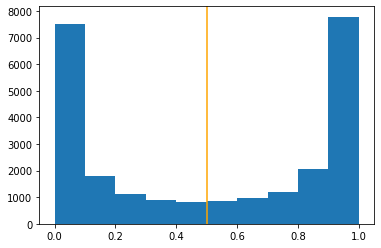

In [207]:
pyplot.hist(y_hat)
_ = pyplot.axvline(x=0.5, color="orange")

Use ROC instead of simple accuracy 

In [213]:
# from sickit-learn
pct_auc = roc_auc_score(y_valid, y_hat) * 100.0
'{:0.2f}'.format(pct_auc)

'92.61'

In [215]:
from sklearn.metrics import roc_curve 
fpr , tpr , thresholds = roc_curve ( y_valid , y_hat)

In [216]:
# false positive rate
fpr

array([0.     , 0.     , 0.     , ..., 0.99976, 0.99992, 1.     ])

In [217]:
# True positive rate
tpr

array([0.00e+00, 8.00e-05, 1.12e-03, ..., 1.00e+00, 1.00e+00, 1.00e+00])

In [218]:
thresholds

array([1.9999228e+00, 9.9992281e-01, 9.9971151e-01, ..., 2.3901463e-05,
       1.9043684e-05, 1.5079975e-05], dtype=float32)

data frame

In [222]:
float_y_hat = []
for y in y_hat:
    float_y_hat.append(y[0])
ydf = pd.DataFrame(list(zip(float_y_hat, y_valid)),
    columns=['y_hat', 'y'])

In [223]:
len(ydf)

25000

In [225]:
ydf.head(10)

,y_hat,y
0,0.266563,0
1,0.986443,1
2,0.908658,1
3,0.588311,0
4,0.991574,1
5,0.784344,1
6,0.854319,1
7,0.010613,0
8,0.791942,0
9,0.882293,1


In [248]:
# false positives
ydf[(ydf.y == 0) & (ydf.y_hat > 0.9)].head(1)

,y_hat,y
75,0.971271,0


In [233]:

' '.join([index_word[id] for id in x_valid[75]])

"extras unk star wars unk unk 5 unk unk need unk unk your crappy movie's unk unk unk title sequence unk adding star trek style credits unk throw unk unk overly unk music unk also helps unk you've got unk previous unk unk pull scenes unk unk unk 6 fight scenes move along much unk unk unk bad guys attack unk unk unk unk time unk unk 7 william unk did anything unk money unk unk 8 unk didn't think unk unk possible unk unk adventures unk unk makes unk first unk unk 1983 look unk unk academy award winner"

In [234]:
# false negatives
ydf[(ydf.y == 1) & (ydf.y_hat < 0.1)].head(10)

,y_hat,y
101,0.042728,1
224,0.083987,1
248,0.021195,1
300,0.051159,1
325,0.085341,1
333,0.035717,1
355,0.041346,1
544,0.063522,1
667,0.048058,1
973,0.092761,1


In [235]:
' '.join([index_word[id] for id in x_valid[973]])

"unk character unk my opinion unk unk unk them did bad another thing unk unk notice unk unk read unk these comment unk unk unk person unk comment unk alan 5 shadow which made him look even better unk unk pretty much had unk through unk whole unk unk would give unk unk unk 9 unk unk 10 another unk unk my opinions unk unk unk would been better unk there wasn't any sex still unk unk alright love unk scene were unk says unk sh t when unk unk setting unk unk car unk see them unk unk mirror"

Conclusion: 

Dense network cannot detect multiple tokens occuring in a sequence.

Need of Recurrent Neural networks, which take into account the sequence of words.

Next module: Try CNN